In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
#Primero veo que datos tengo respecto de estos centros
#Los datos fueron sacados de https://drive.google.com/file/d/0Bx63od1LTzcVelZhd2Q1OW1JLUE/view
centros_de_educacion =  pd.read_csv("/home/santiago/Desktop/Organizacion De Datos (75.06)/TP1/Hospitales/establecimientos-educativos-prov-bsas.csv")
centros_de_educacion.head(10) # 275 registros

,geometry.coordinates,properties.gid,properties.idserv,properties.nombre,properties.clave,properties.cueanexo,properties.calle,properties.nro_calle,properties.localidad,properties.referencia,...,properties.sector,properties.ambito,properties.dependencia_funcional,properties.tipo_establecimiento,properties.modalidad,properties.nivel,properties.alumnos,properties.secciones,properties.capa,properties.descripcionperiodo
0,",",14495,309,"CENTRO DE EDUCACION DE ADULTOS Nº701 ""OLGA COS...",0002DC0701,60415500,BELGRANO,918,CARHUE,NaN,...,Estatal,Urbano,Dirección de Educación de Adultos,CENTRO DE ADULTOS (EGBA),Modalidad de Jóvenes y Adultos,Nivel Primario,28.0,2.0,5,Final 2016
1,",",14495,309,"CENTRO DE EDUCACION DE ADULTOS Nº701 ""OLGA COS...",0002DC0701,60415500,BELGRANO,918,CARHUE,NaN,...,Estatal,Urbano,Dirección de Educación de Adultos,CENTRO DE ADULTOS (EGBA),Modalidad de Jóvenes y Adultos,Espacio de Fortalecimiento y Trayectoria,15.0,1.0,5,Final 2016
2,"-63.24181335030573,",4014,310,CENTRO DE ADULTOS Nº702,0002DC0702,60135800,AV. SAN MARTIN,485,RIVERA,NaN,...,Estatal,Urbano,Dirección de Educación de Adultos,CENTRO DE ADULTOS (EGBA),Modalidad de Jóvenes y Adultos,Nivel Primario,1.0,1.0,5,Final 2016
3,"-63.3393597396601,-36.80135114873639",4015,311,"CENTRO DE ADULTOS Nº703 ""ALFONSINA STORNI""",0002DC0703,60134300,AVDA. SAN MARTIN,250,MAZA,NaN,...,Estatal,Rural Agrupado,Dirección de Educación de Adultos,CENTRO DE ADULTOS (EGBA),Modalidad de Jóvenes y Adultos,Nivel Primario,5.0,1.0,5,Final 2016
4,"-63.3393597396601,-36.80135114873639",4015,311,"CENTRO DE ADULTOS Nº703 ""ALFONSINA STORNI""",0002DC0703,60134300,AVDA. SAN MARTIN,250,MAZA,NaN,...,Estatal,Rural Agrupado,Dirección de Educación de Adultos,CENTRO DE ADULTOS (EGBA),Modalidad de Jóvenes y Adultos,Espacio de Fortalecimiento y Trayectoria,6.0,1.0,5,Final 2016
5,",-37.18021903138305",3999,367,CENTRO DE FORMACION PROFESIONAL Nº401,0002DF0401,61499400,Colón,664,CARHUE,NaN,...,Estatal,Urbano,Dirección Provincial de Educación Técnico Prof...,CENTRO DE FORMACIÓN PROFESIONAL,Modalidad de Jóvenes y Adultos,Formación Profesional,216.0,NaN,7,Final 2016
6,"-62.75515898739718,",14492,312,"ESCUELA ESPECIAL Nº501 ""FUERTE GENERAL BELGRANO""",0002EE0501,60674500,PRINGLES,942,CARHUE,NaN,...,Estatal,Urbano,Dirección de Educación Especial,ESCUELA DE EDUCACIÓN ESPECIAL,Modalidad Especial,Formación Integral,15.0,NaN,11,Final 2016
7,"-62.75515898739718,",14492,312,"ESCUELA ESPECIAL Nº501 ""FUERTE GENERAL BELGRANO""",0002EE0501,60674500,PRINGLES,942,CARHUE,NaN,...,Estatal,Urbano,Dirección de Educación Especial,ESCUELA DE EDUCACIÓN ESPECIAL,Modalidad Especial,Nivel Primario,38.0,NaN,9,Final 2016
8,"-62.75515898739718,",14492,312,"ESCUELA ESPECIAL Nº501 ""FUERTE GENERAL BELGRANO""",0002EE0501,60674500,PRINGLES,942,CARHUE,NaN,...,Estatal,Urbano,Dirección de Educación Especial,ESCUELA DE EDUCACIÓN ESPECIAL,Modalidad Especial,Nivel Inicial,26.0,NaN,8,Final 2016
9,"-62.75515898739718,",14492,312,"ESCUELA ESPECIAL Nº501 ""FUERTE GENERAL BELGRANO""",0002EE0501,60674500,PRINGLES,942,CARHUE,NaN,...,Estatal,Urbano,Dirección de Educación Especial,ESCUELA DE EDUCACIÓN ESPECIAL,Modalidad Especial,Formación Laboral,10.0,NaN,10,Final 2016


In [3]:
centros_de_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22289 entries, 0 to 22288
Data columns (total 25 columns):
geometry.coordinates                22289 non-null object
properties.gid                      22289 non-null int64
properties.idserv                   22289 non-null int64
properties.nombre                   22289 non-null object
properties.clave                    22289 non-null object
properties.cueanexo                 22289 non-null int64
properties.calle                    22150 non-null object
properties.nro_calle                20461 non-null object
properties.localidad                22289 non-null object
properties.referencia               6021 non-null object
properties.email                    19822 non-null object
properties.telefono                 21564 non-null object
properties.codigo_postal            21065 non-null float64
properties.distrito                 22289 non-null object
properties.region_educativa         22289 non-null int64
properties.sector        

In [4]:
#Me interesa la localidad, la clave (por si necesito tener en cuenta los duplicados) y las coordenadas
loc_centros_edu =  centros_de_educacion[["geometry.coordinates","properties.clave","properties.distrito"]].copy()
#Cambio los nombres por comodidad 
loc_centros_edu['distrito'] = loc_centros_edu['properties.distrito']
loc_centros_edu['coordinates'] = loc_centros_edu['geometry.coordinates']
loc_centros_edu['clave'] = loc_centros_edu['properties.clave']
loc_centros_edu = loc_centros_edu[['coordinates','distrito','clave']]
loc_centros_edu = loc_centros_edu.dropna()

In [5]:
#Separo las coordenadas
loc_centros_edu['lon'], loc_centros_edu['lat'] = loc_centros_edu['coordinates'].str.split(',', 1).str
loc_centros_edu.head(10)

,coordinates,distrito,clave,lon,lat
0,",",Adolfo Alsina,0002DC0701,,
1,",",Adolfo Alsina,0002DC0701,,
2,"-63.24181335030573,",Adolfo Alsina,0002DC0702,-63.24181335030573,
3,"-63.3393597396601,-36.80135114873639",Adolfo Alsina,0002DC0703,-63.3393597396601,-36.80135114873639
4,"-63.3393597396601,-36.80135114873639",Adolfo Alsina,0002DC0703,-63.3393597396601,-36.80135114873639
5,",-37.18021903138305",Adolfo Alsina,0002DF0401,,-37.18021903138305
6,"-62.75515898739718,",Adolfo Alsina,0002EE0501,-62.75515898739718,
7,"-62.75515898739718,",Adolfo Alsina,0002EE0501,-62.75515898739718,
8,"-62.75515898739718,",Adolfo Alsina,0002EE0501,-62.75515898739718,
9,"-62.75515898739718,",Adolfo Alsina,0002EE0501,-62.75515898739718,


In [6]:
#Elimino aquellos registros a los que le falta alguna coordenada
loc_centros_edu.dropna(inplace = True)
loc_centros_edu = loc_centros_edu[(loc_centros_edu['lon'] != "") & (loc_centros_edu['lat'] != "")].copy()
loc_centros_edu = loc_centros_edu[['lon','lat','distrito','clave']]
loc_centros_edu.head(10)

,lon,lat,distrito,clave
3,-63.3393597396601,-36.80135114873639,Adolfo Alsina,0002DC0703
4,-63.3393597396601,-36.80135114873639,Adolfo Alsina,0002DC0703
10,-63.24302975621811,-37.16239093319484,Adolfo Alsina,0002EE0502
11,-63.24302975621811,-37.16239093319484,Adolfo Alsina,0002EE0502
12,-63.24302975621811,-37.16239093319484,Adolfo Alsina,0002EE0502
13,-63.24302975621811,-37.16239093319484,Adolfo Alsina,0002EE0502
17,-62.76694030045434,-37.18413728220963,Adolfo Alsina,0002FC0028
18,-62.76344792178401,-37.17682809444085,Adolfo Alsina,0002JI0901
19,-63.24724558731384,-37.16314534118442,Adolfo Alsina,0002JI0902
22,-62.72566233225069,-37.17044240159538,Adolfo Alsina,0002JI0905


In [7]:
#Ya tengo las coordenadas de cada centro en cada barrio de la provincia
#Ahora agrupo por clave (no me interesan duplicados)
loc_centros_edu = loc_centros_edu.drop_duplicates(keep=False)
loc_centros_edu
#Quedan 8601 establecimientos luego de la limpieza de datos

,lon,lat,distrito,clave
17,-62.76694030045434,-37.18413728220963,Adolfo Alsina,0002FC0028
18,-62.76344792178401,-37.17682809444085,Adolfo Alsina,0002JI0901
19,-63.24724558731384,-37.16314534118442,Adolfo Alsina,0002JI0902
22,-62.72566233225069,-37.17044240159538,Adolfo Alsina,0002JI0905
23,-63.25676909841502,-37.45432120256129,Adolfo Alsina,0002JI0906
25,-62.76252490799794,-37.18045648747676,Adolfo Alsina,0002JI0909
27,-63.13022064236861,-36.99005898193633,Adolfo Alsina,0002JS0002
30,-63.14794793734728,-36.8745019814811,Adolfo Alsina,0002JS0005
31,-62.55247771397518,-37.24473794270176,Adolfo Alsina,0002JS0007
32,-63.05381426921298,-37.37284782956351,Adolfo Alsina,0002JS0008


In [8]:
#Ahora cargo las propiedades de todos los archivos de properati
agosto_2013 = pd.read_csv('Datos All/2013/properati-AR-2013-08-01-properties-sell.csv', low_memory = False)
septiembre_2013 = pd.read_csv('Datos All/2013/properati-AR-2013-09-01-properties-sell.csv', low_memory = False)
octubre_2013 = pd.read_csv('Datos All/2013/properati-AR-2013-10-01-properties-sell.csv', low_memory = False)
noviembre_2013 = pd.read_csv('Datos All/2013/properati-AR-2013-11-01-properties-sell.csv', low_memory = False)
diciembre_2013 = pd.read_csv('Datos All/2013/properati-AR-2013-12-01-properties-sell.csv', low_memory = False)
enero_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-01-01-properties-sell.csv', low_memory = False)
febrero_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-02-01-properties-sell.csv', low_memory = False)
marzo_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-03-01-properties-sell.csv', low_memory = False)
abril_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-04-01-properties-sell.csv', low_memory = False)
mayo_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-05-01-properties-sell.csv', low_memory = False)
junio_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-06-01-properties-sell.csv', low_memory = False)
julio_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-07-01-properties-sell.csv', low_memory = False)
agosto_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-08-01-properties-sell.csv', low_memory = False)
septiembre_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-09-01-properties-sell.csv', low_memory = False)
octubre_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-10-01-properties-sell.csv', low_memory = False)
noviembre_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-11-01-properties-sell.csv', low_memory = False)
diciembre_2014 = pd.read_csv('Datos All/2014/properati-AR-2014-12-01-properties-sell.csv', low_memory = False)

In [9]:
todas_las_ventas_2013 = pd.concat([agosto_2013,septiembre_2013,octubre_2013,noviembre_2013,diciembre_2013])
todas_las_ventas_2014 =  pd.concat([enero_2014,febrero_2014,marzo_2014,abril_2014,mayo_2014,junio_2014,julio_2014,
                                    agosto_2014,septiembre_2014,octubre_2014,noviembre_2014,diciembre_2014])
todas_las_ventas_2013 = todas_las_ventas_2013[['created_on','properati_url','place_with_parent_names','place_name','price_usd_per_m2','lat','lon']]
todas_las_ventas_2014 = todas_las_ventas_2014[['created_on','properati_url','place_with_parent_names','place_name','price_usd_per_m2','lat','lon']]

In [10]:
#Comienzo a filtrar
todas_las_ventas_2013.dropna(inplace=True)
todas_las_ventas_2014.dropna(inplace=True)

In [11]:
#Ahora uno todos los dataframes
ventas_properati = pd.concat([todas_las_ventas_2013,todas_las_ventas_2014])
ventas_properati.head(10) #Se tienen 555319 registros

,created_on,properati_url,place_with_parent_names,place_name,price_usd_per_m2,lat,lon
4,2012-08-08,http://www.properati.com.ar/ak_venta_casa_vill...,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,Villa Ballester,315.186246,-34.558247,-58.564806
7,2012-08-08,http://www.properati.com.ar/ax_venta_casa_san-...,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,San Martín,647.058824,-34.561351,-58.516614
11,2012-08-08,http://www.properati.com.ar/iw_venta_departame...,|Argentina|Capital Federal|Palermo|,Palermo,2716.406250,-34.597915,-58.417149
12,2012-08-08,http://www.properati.com.ar/ix_venta_departame...,|Argentina|Capital Federal|Palermo|,Palermo,2602.204082,-34.597915,-58.417149
15,2012-08-08,http://www.properati.com.ar/3vs_venta_casa_tig...,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Tigre,1176.470588,-34.451013,-58.626786
17,2012-08-09,http://www.properati.com.ar/8sf_venta_casa_flo...,|Argentina|Capital Federal|Flores|,Flores,880.000000,-34.626877,-58.478199
19,2012-08-15,http://www.properati.com.ar/cq9_venta_departam...,|Argentina|Capital Federal|Floresta|,Floresta,2076.000000,-34.633633,-58.484419
20,2012-08-15,http://www.properati.com.ar/crs_venta_casa_par...,|Argentina|Capital Federal|Parque Centenario|,Parque Centenario,1083.333333,-34.608820,-58.430529
21,2012-08-17,http://www.properati.com.ar/cv5_venta_departam...,|Argentina|Capital Federal|Liniers|,Liniers,1064.814815,-34.651912,-58.519874
23,2012-08-29,http://www.properati.com.ar/dny_venta_departam...,|Argentina|Capital Federal|Constitución|,Constitución,1725.000000,-34.628097,-58.390967


In [12]:
#Me enfoco solo en provincia, dado que solo tengo datos alli
#Agrupo por properati_url
ventas_properati_gba = ventas_properati[ventas_properati.place_with_parent_names.str.contains("Buenos Aires") | 
                                        ventas_properati.place_with_parent_names.str.contains("Bs.As")].copy()
ventas_properati_gba

,created_on,properati_url,place_with_parent_names,place_name,price_usd_per_m2,lat,lon
4,2012-08-08,http://www.properati.com.ar/ak_venta_casa_vill...,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,Villa Ballester,315.186246,-34.558247,-58.564806
7,2012-08-08,http://www.properati.com.ar/ax_venta_casa_san-...,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,San Martín,647.058824,-34.561351,-58.516614
15,2012-08-08,http://www.properati.com.ar/3vs_venta_casa_tig...,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Tigre,1176.470588,-34.451013,-58.626786
27,2012-09-08,http://www.properati.com.ar/js0_venta_casa_pil...,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Pilar,1396.648045,-34.444462,-58.883850
30,2012-09-19,http://www.properati.com.ar/u8a_venta_departam...,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Pilar,2116.766857,-34.446121,-58.917174
31,2012-09-19,http://www.properati.com.ar/u8b_venta_departam...,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Pilar,2116.766857,-34.446121,-58.917174
32,2012-09-19,http://www.properati.com.ar/u8d_venta_departam...,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Pilar,2116.766857,-34.446121,-58.917174
33,2012-09-19,http://www.properati.com.ar/u8i_venta_departam...,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Pilar,2351.952571,-34.446121,-58.917174
42,2012-09-19,http://www.properati.com.ar/udh_venta_casa_mer...,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,San Antonio De Padua,209.424084,-34.676801,-58.693682
43,2012-09-19,http://www.properati.com.ar/ugn_venta_departam...,|Argentina|Bs.As. G.B.A. Zona Norte|San Fernan...,Victoria,833.333333,-34.454153,-58.539857


In [13]:
#Me interesa solo del 2013 en adelante
ventas_properati_gba = ventas_properati_gba[ventas_properati_gba.created_on.str.contains('2012') ==False]
#Elimino duplicados
ventas_properati_gba.drop_duplicates(subset='properati_url', keep="first", inplace=True)


/home/santiago/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
#Ahora solo me quedo con las columnas que me interesan
ventas_properati_gba = ventas_properati_gba[['place_name','price_usd_per_m2','lat','lon']]
ventas_properati_gba

,place_name,price_usd_per_m2,lat,lon
7618,Torreón,1875.000000,-38.009416,-57.537972
7624,Chauvín,1146.153846,-38.014223,-57.564289
7625,Parque Luro,1500.000000,-37.979652,-57.554066
7631,Lanús Oeste,2000.000000,-34.637438,-58.407555
7632,Tigre,2000.000000,-34.425087,-58.579658
7635,Jose Leon Suarez,766.666667,-34.528673,-58.573267
7636,Olivos,2275.379310,-34.546085,-58.458126
7638,Olivos,2500.000000,-34.546085,-58.458126
7639,Los Polvorines,1318.181818,-34.524911,-58.708832
7640,San Miguel,1400.000000,-34.533983,-58.721262


In [15]:
#Voy a buscar, para cada propiedad, cual es el establecimiento escolar mas cercano, y la distancia al mismo
#Cuando logre hacer esto, voy a graficar el precio de la propiedad vs la distancia al establecimiento mas cercano
precio_segun_distancia = ventas_properati_gba.copy()
#Agrego 2 columnas donde va a ir la informacion
precio_segun_distancia['distancia_minima_escuela (m)'] = 0
precio_segun_distancia.head(10)
loc_centros_edu[['lat','lon']] = loc_centros_edu[['lat','lon']].astype(float)
loc_centros_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8601 entries, 17 to 22287
Data columns (total 4 columns):
lon         8601 non-null float64
lat         8601 non-null float64
distrito    8601 non-null object
clave       8601 non-null object
dtypes: float64(2), object(2)
memory usage: 336.0+ KB


In [24]:
#Defino una funcion que calcula la distancia entre dos puntos
import math
def dist(lat1,lon1,lat2,lon2):
    dLat = math.radians(lat2-lat1)
    dLon = math.radians(lon2-lon1)

    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)

    a = math.sin(dLat/2) * math.sin(dLat/2) + math.sin(dLon/2) * math.sin(dLon/2) * math.cos(lat1) * math.cos(lat2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return c * 6371 * 1000
    #return np.abs((lat1 - lat2) + (lon1 - lon2))

def encontrar_escuela_mas_cercana(lat, lon):
    distancias = loc_centros_edu.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return loc_centros_edu.loc[distancias.idxmin(), 'clave']

def dist2(lat,lon):
    distancias = loc_centros_edu.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return distancias.min()
    
precio_segun_distancia['escuela_mas_cercana'] = precio_segun_distancia[:5000].apply(lambda row: encontrar_escuela_mas_cercana(
                                                                                  row['lat'], row['lon']), axis=1)
precio_segun_distancia['distancia_minima_escuela* (m)'] = precio_segun_distancia[:5000].apply(lambda row: dist2(row['lat'], 
                                                                                       row['lon']), axis=1)
precio_segun_distancia.head(100)

,place_name,price_usd_per_m2,lat,lon,distancia_minima_escuela,escuela_mas_cercana,distancia_minima_escuela* (m)
7618,Torreón,1875.000000,-38.009416,-57.537972,503.163042,4043MS6520,503.163042
7624,Chauvín,1146.153846,-38.014223,-57.564289,130.570679,4043MS2574,130.570679
7625,Parque Luro,1500.000000,-37.979652,-57.554066,434.343628,0043MS0067,434.343628
7631,Lanús Oeste,2000.000000,-34.637438,-58.407555,2998.409188,0111PP0013,2998.409188
7632,Tigre,2000.000000,-34.425087,-58.579658,435.546146,4055JI9008,435.546146
7635,Jose Leon Suarez,766.666667,-34.528673,-58.573267,338.204368,0045PP0050,338.204368
7636,Olivos,2275.379310,-34.546085,-58.458126,1708.030191,4109PP5336,1708.030191
7638,Olivos,2500.000000,-34.546085,-58.458126,1708.030191,4109PP5336,1708.030191
7639,Los Polvorines,1318.181818,-34.524911,-58.708832,716.960610,4133MS6842,716.960610
7640,San Miguel,1400.000000,-34.533983,-58.721262,146.316629,4131JI2533,146.316629


In [27]:
precio_segun_distancia.dropna(inplace=True)
precio_segun_distancia

,place_name,price_usd_per_m2,lat,lon,distancia_minima_escuela,escuela_mas_cercana,distancia_minima_escuela* (m)
7618,Torreón,1875.000000,-38.009416,-57.537972,503.163042,4043MS6520,503.163042
7624,Chauvín,1146.153846,-38.014223,-57.564289,130.570679,4043MS2574,130.570679
7625,Parque Luro,1500.000000,-37.979652,-57.554066,434.343628,0043MS0067,434.343628
7631,Lanús Oeste,2000.000000,-34.637438,-58.407555,2998.409188,0111PP0013,2998.409188
7632,Tigre,2000.000000,-34.425087,-58.579658,435.546146,4055JI9008,435.546146
7635,Jose Leon Suarez,766.666667,-34.528673,-58.573267,338.204368,0045PP0050,338.204368
7636,Olivos,2275.379310,-34.546085,-58.458126,1708.030191,4109PP5336,1708.030191
7638,Olivos,2500.000000,-34.546085,-58.458126,1708.030191,4109PP5336,1708.030191
7639,Los Polvorines,1318.181818,-34.524911,-58.708832,716.960610,4133MS6842,716.960610
7640,San Miguel,1400.000000,-34.533983,-58.721262,146.316629,4131JI2533,146.316629


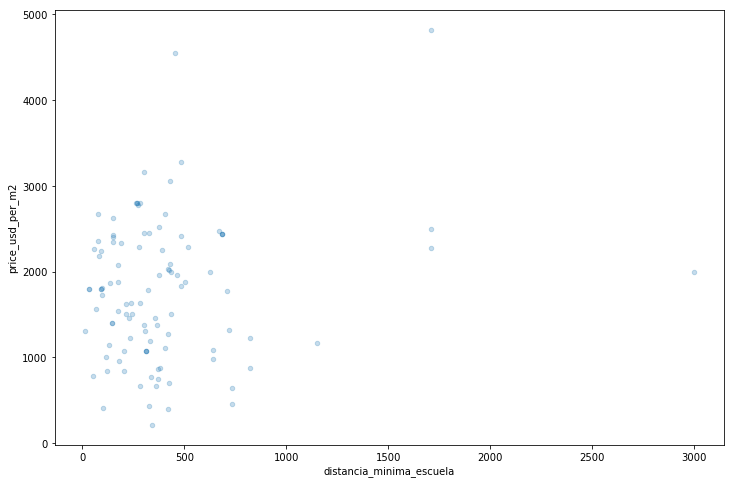

In [28]:
%matplotlib inline
precio_segun_distancia.plot.scatter('distancia_minima_escuela', 'price_usd_per_m2',alpha=0.25, figsize=(12,8))